# Import Libraries

In [1]:
!pip install mlxtend

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Load Thai Font
import matplotlib as mpl
# mpl.font_manager.fontManager.addfont('/content/drive/MyDrive/CRM/Cross_selling_model/THSarabunChula-Regular.ttf')
# mpl.rc('font', family='TH Sarabun Chula')

mpl.font_manager.fontManager.addfont('/content/drive/MyDrive/CRM/Cross_selling_model/K2D/K2D-Regular.ttf')
mpl.rc('font', family='K2D')

# Import Dataset

In [5]:
df = pd.read_csv('/content/drive/MyDrive/CRM/Cross_selling_model/Customer Preference Survey (Responses) - Form Responses 1.csv')
print(df.shape)
df.head()

(47, 42)


,Timestamp,playstation5,เครื่องทำขนมปัง,Ergonomic Wrist Rest,เครื่องอบผ้า,เครื่องชงกาแฟแคปซูล,เก้าอี้ LA-Z-Boy,เครื่องให้อาหารสัตว์อัตโนมัติ,บัตตาเลี่ยน,แก้วเก็บความเย็น,ลู่วิ่งออกกำลังกาย,Kindle,เครื่องซักผ้า,Bluetooth Speaker,ห้องน้ำแมวอัตโนมัติ,PS5,ทรายแมว,ลำโพง pixel,Logitech Mx Master 3 Mouse,ตุ๊กตา ty,น้ำพุแมว,Robot ดูดฝุ่น,Mechanical keyboard,Nintendo switch,หนังสือ python,gaming chair,Deskmat,Dew - ไฟโรเซ่,เทียนหอม jo malone,กระติกน้ำ 2 ลิตร,ที่นอน memory form,พลาสเตอร์บรรเทาปวด ตราเสือ,การ์ดจอ RTX 3080,ขนมจีนน้ำยาปู,Salmon Sashimi,จักรยานเสือหมอบ,ไฟแต่งห้องมินิมอล,External Harddisk,หม้อทอดไร้น้ํามัน,airpods,ยาดม,ไฟส่องหน้าไลฟ์สด
0,10/17/2021 17:29:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10/17/2021 17:43:38,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
2,10/17/2021 17:43:41,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,เคย,ไม่เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
3,10/17/2021 17:43:46,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,เคย,ไม่เคย,เคย,เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ
4,10/17/2021 17:43:49,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคย,เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ


In [6]:
df.isnull().sum()

Timestamp                        0
playstation5                     1
เครื่องทำขนมปัง                  1
Ergonomic Wrist Rest             1
เครื่องอบผ้า                     1
เครื่องชงกาแฟแคปซูล              1
เก้าอี้ LA-Z-Boy                 1
เครื่องให้อาหารสัตว์อัตโนมัติ    1
บัตตาเลี่ยน                      2
แก้วเก็บความเย็น                 1
ลู่วิ่งออกกำลังกาย               1
Kindle                           1
เครื่องซักผ้า                    1
Bluetooth Speaker                1
ห้องน้ำแมวอัตโนมัติ              1
PS5                              1
ทรายแมว                          1
ลำโพง pixel                      1
Logitech Mx Master 3 Mouse       1
ตุ๊กตา ty                        1
น้ำพุแมว                         1
Robot ดูดฝุ่น                    1
Mechanical keyboard              2
Nintendo switch                  2
หนังสือ python                   1
gaming chair                     2
Deskmat                          1
Dew - ไฟโรเซ่                    1
เทียนหอม jo malone  

# Data Cleansing

### Drop Missing Value

In [7]:
features = [i for i in df.columns if i != "Timestamp"]
df.dropna(subset = features, inplace=True,how = 'all')
# impute missing value
df.fillna(0, inplace = True)
for i in features:
  df[i] = np.where(df[i] == "เคยซื้อ", 1, 0)
print(df.shape)
df.head()

(46, 42)


,Timestamp,playstation5,เครื่องทำขนมปัง,Ergonomic Wrist Rest,เครื่องอบผ้า,เครื่องชงกาแฟแคปซูล,เก้าอี้ LA-Z-Boy,เครื่องให้อาหารสัตว์อัตโนมัติ,บัตตาเลี่ยน,แก้วเก็บความเย็น,ลู่วิ่งออกกำลังกาย,Kindle,เครื่องซักผ้า,Bluetooth Speaker,ห้องน้ำแมวอัตโนมัติ,PS5,ทรายแมว,ลำโพง pixel,Logitech Mx Master 3 Mouse,ตุ๊กตา ty,น้ำพุแมว,Robot ดูดฝุ่น,Mechanical keyboard,Nintendo switch,หนังสือ python,gaming chair,Deskmat,Dew - ไฟโรเซ่,เทียนหอม jo malone,กระติกน้ำ 2 ลิตร,ที่นอน memory form,พลาสเตอร์บรรเทาปวด ตราเสือ,การ์ดจอ RTX 3080,ขนมจีนน้ำยาปู,Salmon Sashimi,จักรยานเสือหมอบ,ไฟแต่งห้องมินิมอล,External Harddisk,หม้อทอดไร้น้ํามัน,airpods,ยาดม,ไฟส่องหน้าไลฟ์สด
1,10/17/2021 17:43:38,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
2,10/17/2021 17:43:41,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0
3,10/17/2021 17:43:46,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,1,1,1,0,1,1,0,1,1,1,1,1,1
4,10/17/2021 17:43:49,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0
5,10/17/2021 17:43:55,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,0,0,1,1,0,1,1,0,1,0


Number of features: 41


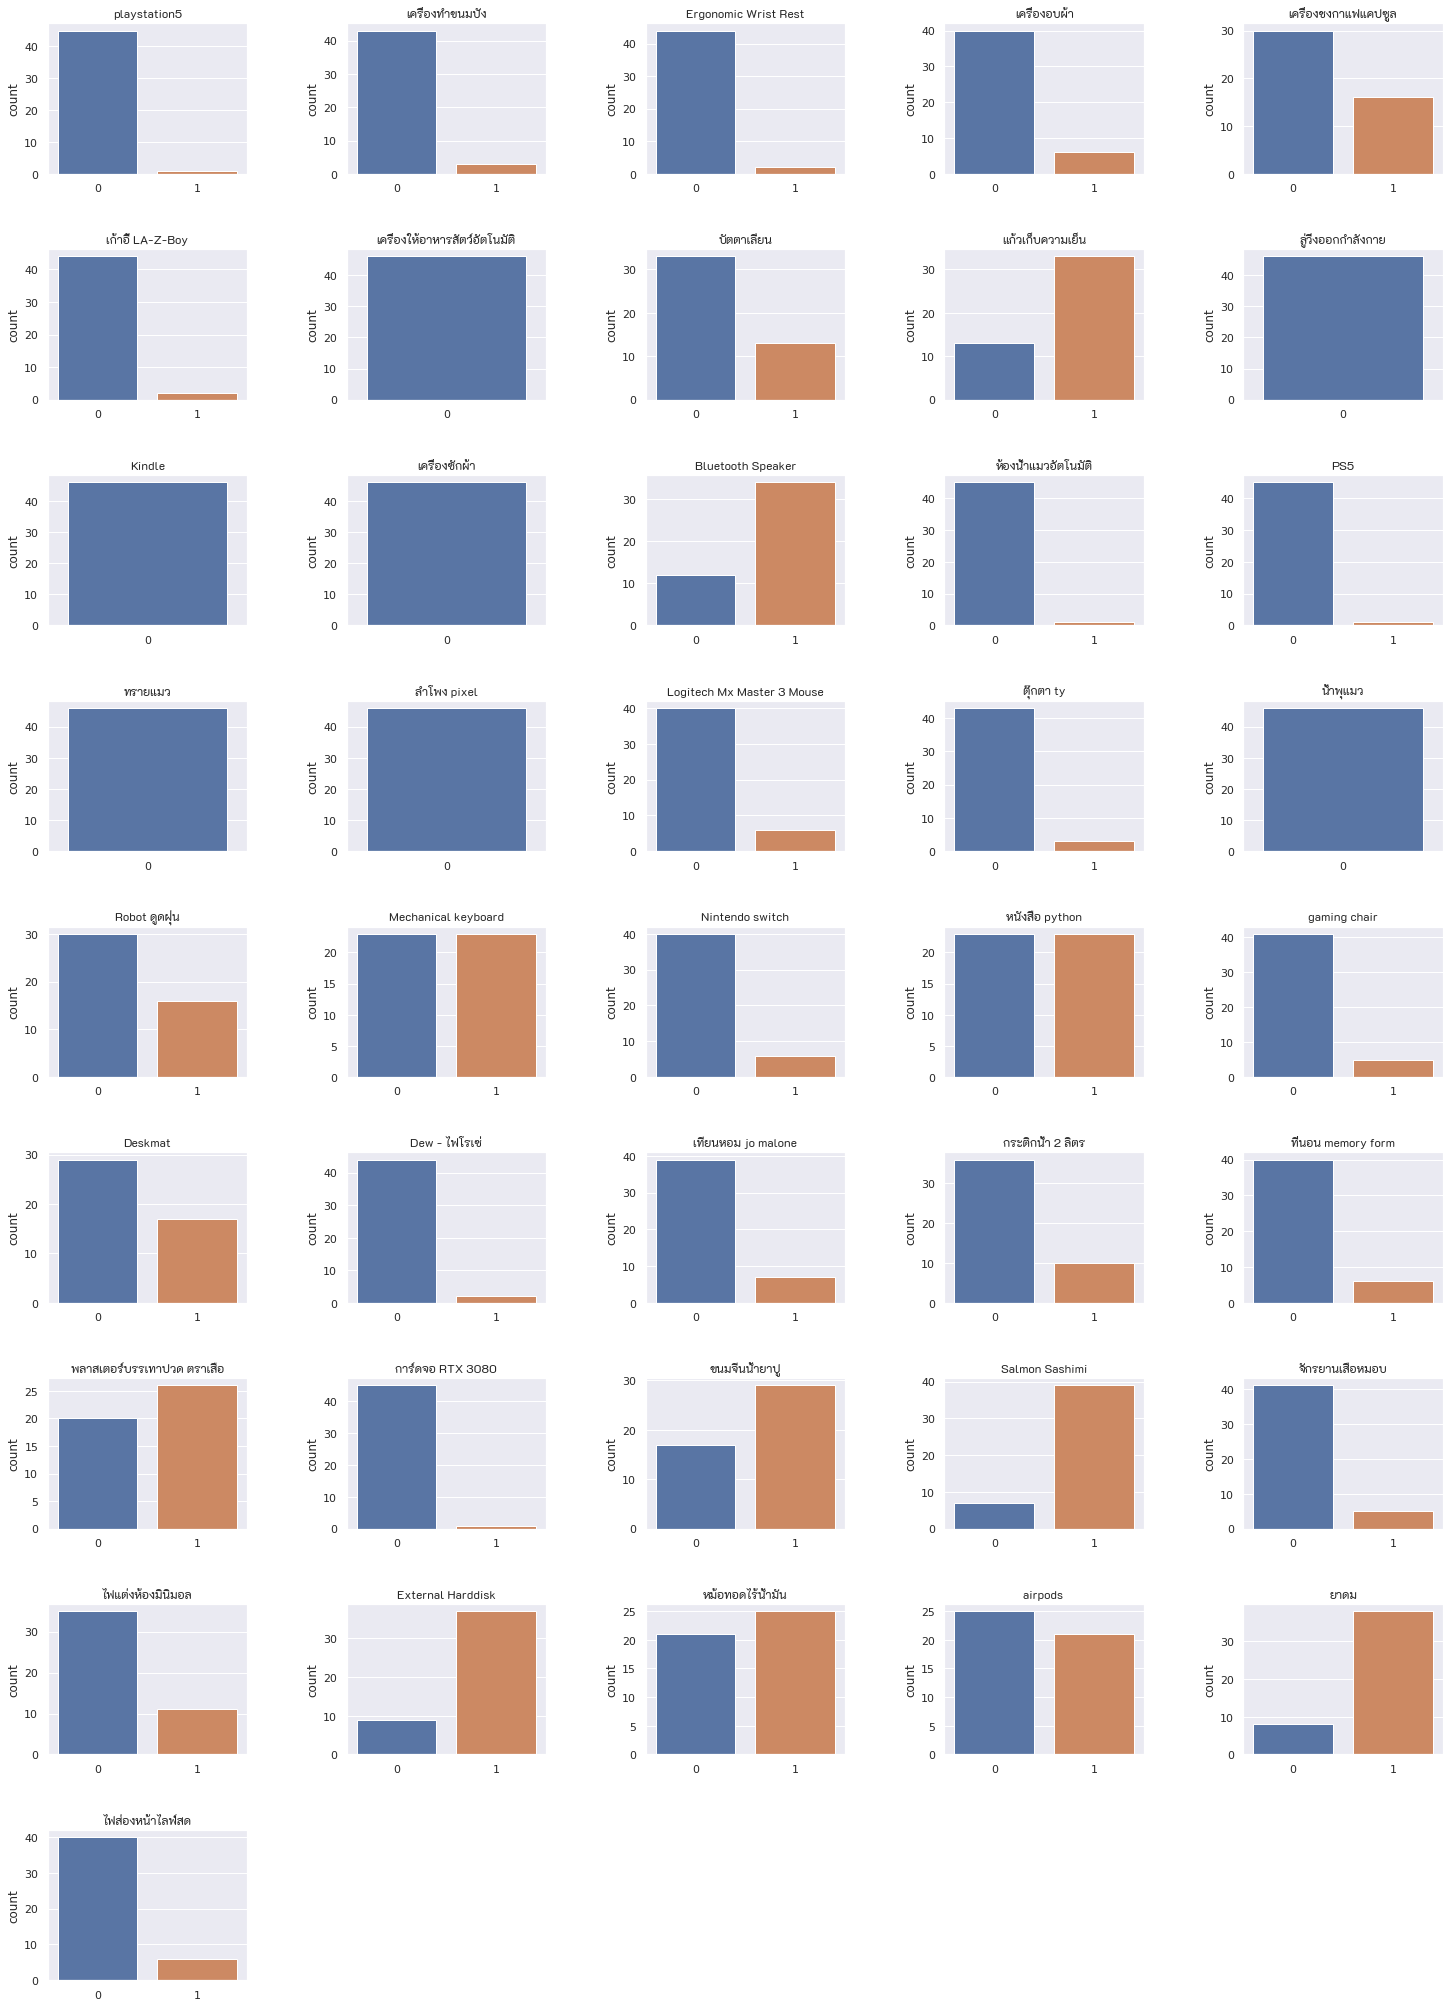

In [32]:
numfeat = len(features)
print("Number of features:", numfeat)
sns.set_theme(style="darkgrid")
column = 5
row = int(np.ceil(numfeat/column))
fig = plt.figure()
fig.set_size_inches(column * 5, row * 4, forward=True)
fig.subplots_adjust(wspace=0.5, hspace=0.5)
fig.tight_layout() 

for i, feat in enumerate(features):
  ax = fig.add_subplot(row,column,i+1)
  sns.countplot(x=feat, data=df, ax=ax).set_title(feat, fontdict={'family': 'K2D'})
  ax.set(xlabel=None)

In [9]:
items_df = df.mean().sort_values().to_frame().reset_index().rename(columns = {'index':'feature', 0:'mean'})
items_df.head()

,feature,mean
0,ลู่วิ่งออกกำลังกาย,0.0
1,ลำโพง pixel,0.0
2,ทรายแมว,0.0
3,เครื่องซักผ้า,0.0
4,Kindle,0.0


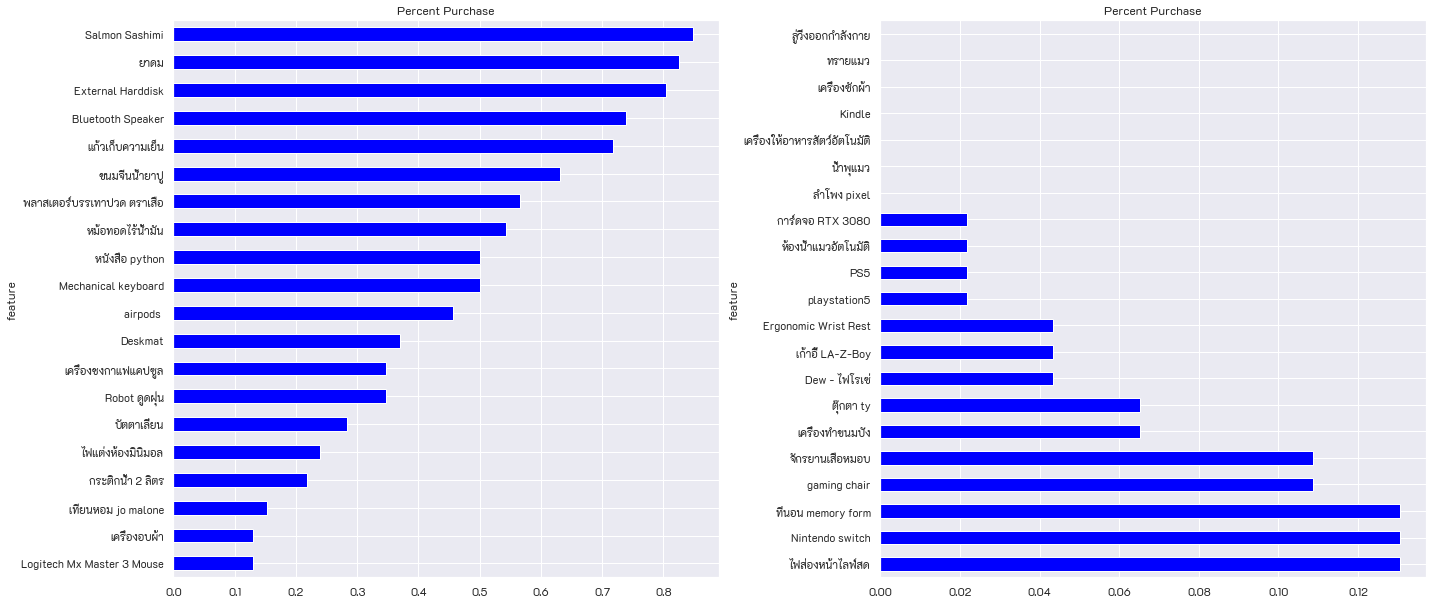

In [12]:
%matplotlib inline
 
fig, ax = plt.subplots(1,2, figsize=(20,8.5), tight_layout=True)
items_df[21:].plot.barh(x = 'feature', y = 'mean',stacked=True, color='blue', ax=ax[0], title='Percent Purchase', legend=False)
items_df[:21].sort_values('mean',ascending = False).plot.barh(x = 'feature', y = 'mean', stacked=True, color='blue', ax=ax[1], title='Percent Purchase', legend=False)
plt.show()

# Association Rules

In [13]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(df[features], min_support=0.5, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.717391,(แก้วเก็บความเย็น)
1,0.739130,(Bluetooth Speaker)
2,0.500000,(Mechanical keyboard)
3,0.500000,(หนังสือ python)
4,0.565217,(พลาสเตอร์บรรเทาปวด ตราเสือ)
5,0.630435,(ขนมจีนน้ำยาปู)
6,0.847826,(Salmon Sashimi)
7,0.804348,(External Harddisk)
8,0.543478,(หม้อทอดไร้น้ํามัน)
9,0.826087,(ยาดม)


In [14]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values(by=["lift", "confidence"], ascending = False, inplace = True)
print(rules.shape)
rules.head()

(80, 9)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
51,(พลาสเตอร์บรรเทาปวด ตราเสือ),"(Salmon Sashimi, ยาดม)",0.565217,0.739130,0.521739,0.923077,1.248869,0.103970,3.391304
50,"(Salmon Sashimi, ยาดม)",(พลาสเตอร์บรรเทาปวด ตราเสือ),0.739130,0.565217,0.521739,0.705882,1.248869,0.103970,1.478261
48,"(พลาสเตอร์บรรเทาปวด ตราเสือ, Salmon Sashimi)",(ยาดม),0.521739,0.826087,0.521739,1.000000,1.210526,0.090737,inf
53,(ยาดม),"(พลาสเตอร์บรรเทาปวด ตราเสือ, Salmon Sashimi)",0.826087,0.521739,0.521739,0.631579,1.210526,0.090737,1.298137
70,"(Bluetooth Speaker, Salmon Sashimi)","(External Harddisk, ยาดม)",0.630435,0.673913,0.500000,0.793103,1.176863,0.075142,1.576087


In [15]:
rules[['lift', 'confidence', 'support']].describe()

,lift,confidence,support
count,80.000000,80.000000,80.000000
mean,1.083762,0.778549,0.551087
std,0.059612,0.112348,0.056530
min,1.001815,0.589744,0.500000
25%,1.028447,0.676471,0.500000
50%,1.075250,0.781834,0.521739
75%,1.125631,0.874434,0.570652
max,1.248869,1.000000,0.739130


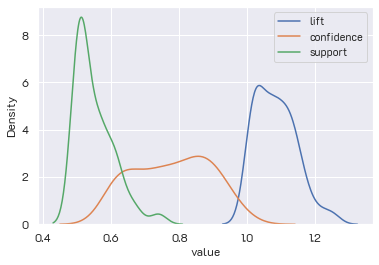

In [16]:
for i in ['lift', 'confidence', 'support']:
  sns.kdeplot(rules[i], label = i)
plt.xlabel('value')
plt.legend()
plt.show()

In [17]:
rules['antecedents'].value_counts()

(ยาดม)                                                    13
(Salmon Sashimi)                                          11
(External Harddisk)                                        9
(Bluetooth Speaker)                                        7
(Salmon Sashimi, ยาดม)                                     5
(พลาสเตอร์บรรเทาปวด ตราเสือ)                               4
(Bluetooth Speaker, External Harddisk)                     3
(Salmon Sashimi, External Harddisk)                        3
(ขนมจีนน้ำยาปู)                                            3
(External Harddisk, ยาดม)                                  3
(Bluetooth Speaker, ยาดม)                                  3
(Bluetooth Speaker, Salmon Sashimi)                        3
(แก้วเก็บความเย็น)                                         2
(พลาสเตอร์บรรเทาปวด ตราเสือ, ยาดม)                         1
(แก้วเก็บความเย็น, Salmon Sashimi)                         1
(พลาสเตอร์บรรเทาปวด ตราเสือ, Salmon Sashimi)               1
(แก้วเก็บความเย็น, ยาดม)

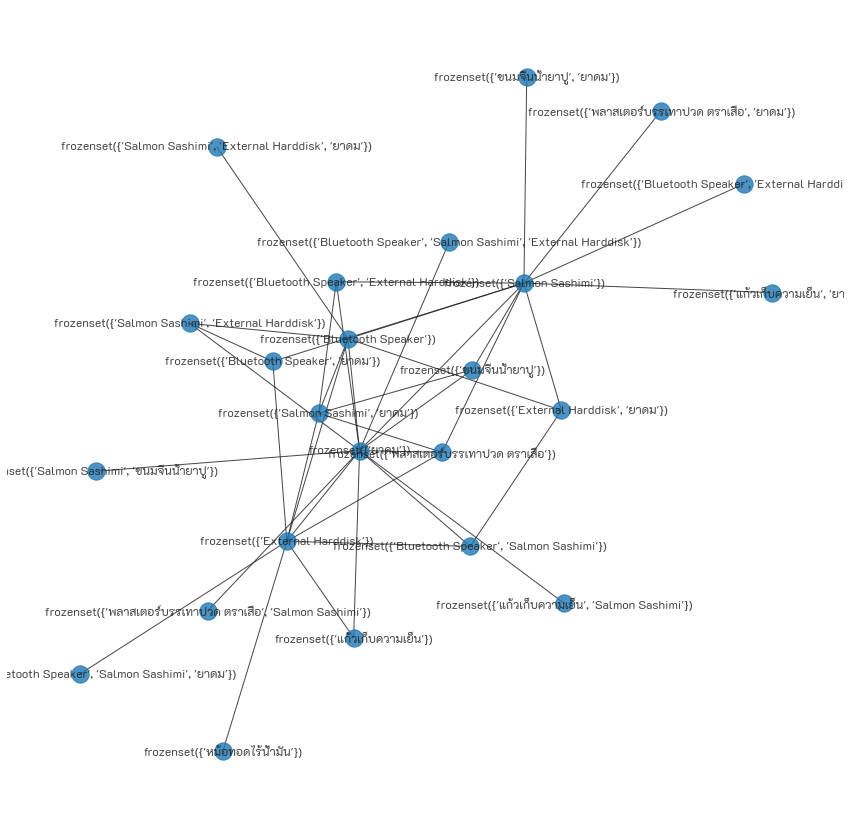

In [24]:
import networkx as nx
labels_params = {'font_family': 'K2D', 'alpha':.8, 'font_size':12}
fig, ax=plt.subplots(figsize=(15,15))
GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True, **labels_params)
plt.show()